<br/>

<img src="https://uploads-ssl.webflow.com/614b1fe22fa8b90ef41aeffe/6265cb48f9496b1cefc9ab75_logotipo-mbit-39.png" width="200px" align="right" CLASS="TextWrap" style="background-color:#2a3f3f;">

<h1><font color="#2a3f3f" size=5>PC1:Consolidación de conocimientos de Pandas, SQL y NoSQL</font></h1>

<br/>
<div style="text-align: right">
<font color="#2a3f3f" size=3>Jorge Moreno - morenocabellos@mbitschool.com</font><br>
</div>


## <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Objetivo

Este proyecto tiene como objetivo consolidar conocimientos sobre la manipulación de datos con Pandas, el manejo de bases de datos relacionales (SQLite) y la preparación de los datos para una posible inserción en bases de datos no relacionales (MongoDB). ). El tiempo estimado de trabajo es de 2-3 horas por alumno. Este tiempo es una simple referencia, tener en cuenta que hasta que no os enfrentais al proyecto de consolidación no comprobamos si hemos interiorizado los conocimientos de las clases. Esto no es un examen vinculante para la nota final del master, la corrección es simplemente orientativa para ayudaros a saber donde esta cada uno y si va en la buena dirección respecto el aprendizaje.

## <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Instrucciones detalladas

Los dos conjuntos de datos están relacionados con las variantes winequality-white y winequality-red del vino portugués "Vinho Verde". Estos conjuntos de datos pueden considerarse tareas de clasificación o regresión. Las clases están ordenadas y no equilibradas (p. ej., hay muchos más vinos normales que excelentes o deficientes). Detectar valores atípicos para detectar los pocos vinos excelentes o deficientes. Además, no estamos seguros de que todas las variables de entrada sean relevantes. Por lo tanto, podría ser interesante probar métodos de selección de características.

Información de los atributos:

Variables de entrada (basadas en pruebas fisicoquímicas):

1 - Acidez fija    (fixed acidity)

2 - Acidez volátil (volatile acidity)

3 - Ácido cítrico  (citric acid)

4 - Azúcar residual (residual sugar)

5 - Cloruros       (chlorides)

6 - Dióxido de azufre libre (free sulfur dioxide)

7 - Dióxido de azufre total (total sulfur dioxide)

8 - Densidad      (density)

9 - pH            (pH)

10 - Sulfatos     (sulphates)

11 - Alcohol      (alcohol)

Variable de salida (basada en datos sensoriales):
12 - Calidad      (puntuación entre 0 y 10) (quality)

### <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i>1. Descarga de datos

•	Asegúrate de que ambos datasets se encuentren disponibles en tu entorno de trabajo como archivos CSV.


•	Idealmente, intenta llevarlo a cabo de manera programática para no tener que hacer operaciones manualmente.


In [2]:
import pandas as pd
import requests as rq
import zipfile as zp
from bs4 import BeautifulSoup as bs
import io #para archivos en memoria
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3 as sql
import json as json

•	Descarga los datasets para vinos tintos y blancos desde la siguiente URL: Wine Quality Dataset.https://archive.ics.uci.edu/dataset/186/wine+quality


In [3]:
"""Descargar los datos de los archivos CSV desde URL: https://archive.ics.uci.edu/dataset/186/wine+quality y guardarlos localmente.
Investigando un poco he encontrado que los datos están disponibles en un archivo ZIP en la siguiente URL:
<a class="btn btn-primary w-full text-primary-content" href="/static/public/186/wine+quality.zip" download="wine+quality.zip" target="_blank"></a>
Con lo cual usaré las librerias requests, beautifulsoup4 y zipfile para descargar y extraer los archivos CSV, el resto de librerías serviran para el procesamiento de los datos.
"""
url = 'https://archive.ics.uci.edu/dataset/186/wine+quality'
#utilizamos un try/catch por si la llamada a la url no es válida.
try:
    response = rq.get(url) # Lanza la petición get a la url
    response.raise_for_status() # Lanza un error si la petición falla
    html_content = response.text # Obtiene el contenido HTML de la página
except rq.exceptions.RequestException as e:
    print(f"Error al descargar la página: {e}") #Recogemos y mostramos la excepción que nos devuelve al lanzar la petición si existe.
    exit()

#Creamos la sopa
soup = bs(html_content, 'html.parser')
#Buscamos el enlace de descarga del archivo ZIP
zip_link =  soup.select_one('a.btn.btn-primary.w-full.text-primary-content')['href']
url_download_zip = 'https://archive.ics.uci.edu' + zip_link

#Una vez hemos obtenido la url de descarga, extraemos los archivos csv del zip, los cuales están en memoria
try:
   with zp.ZipFile(io.BytesIO(rq.get(url_download_zip).content)) as thezip: # Abrir el zip en memoria sin descargarlo.
        # Extraer los archivos CSV
        for file_name in thezip.namelist():
            if file_name.endswith('.csv'): #descargamos solamente los que tienen formato csv
                thezip.extract(file_name, path='data') # Extraer a la carpeta 'data'
                print(f"Archivo {file_name} descargado correctamente!")
except Exception as e:
    print(f"Ocurrió un error: {e}") # Recogemos el error y mostramos en caso de que no hayamos podido obtener y descargar los archivos csvs.
    exit()

Archivo winequality-red.csv descargado correctamente!
Archivo winequality-white.csv descargado correctamente!


Nota: Tener en cuenta que los archivos CSV pueden tener un caracter separador diferente a la coma ¿Si ese caracter es diferente como lo gestionamos? Documentaros sobre el comando de lectura del archivo propuesto.

### <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i>2. Combinar los datos

•	Usa Pandas para cargar ambos datasets en dataframes en memoria.

•	Combina los datos en un único dataframe añadiendo una columna adicional que indique el tipo de vino (red o white).

•	¿Cuántos registros tenemos? ¿Cuántas variables y de qué tipo?


In [4]:
"""Anteriormente ya ha quedado importado la librería de pandas para usar ahora."""

'Anteriormente ya ha quedado importado la librería de pandas para usar ahora.'

In [5]:
"""A continuación:
- Combinamos los datos añadiendo una columna 'type' (para seguir el lenguaje de las columnas la pondremos en ENG) para distinguir entre vino tinto y blanco.
- Cargamos los datos en un único dataframe
"""

df_wine_red = pd.read_csv('data/winequality-red.csv', sep=';') # Leemos el csv, el cual está separado por ;

df_wine_white = pd.read_csv('data/winequality-white.csv', sep=';') # Leemos el csv, el cual está separado por ;

df_wine_red['type'] = 'red' # Añadimos la columna type para el tipo de vino
df_wine_white['type'] = 'white' # Añadimos la columna type para el tipo de vino

df_wine = pd.concat([df_wine_red, df_wine_white], ignore_index=True) # Existen varias alternativas para unir los dos dfs, he utilizado esta porque concatena o apila los objetos a lo largo de un eje

df_wine.sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4898            6.8              0.32         0.32             8.7      0.029   
4350            6.8              0.17         0.36             1.4      0.036   
5986            7.1              0.21         0.33             1.2      0.039   
2082            6.7              0.47         0.34             8.9      0.043   
4911            5.9              0.24         0.28             1.3      0.032   
5993            6.3              0.20         0.26            12.7      0.046   
4074            7.4              0.56         0.09             1.5      0.071   
2171            6.7              0.34         0.54            16.3      0.047   
5699            6.3              0.29         0.23            14.2      0.037   
2925            6.5              0.22         0.72             6.8      0.042   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4898                 31.0                 105.0  0.99146  3.00       0.34   
4350                 38.0                 108.0  0.99006  3.19       0.66   
5986                 34.0                  97.0  0.99112  3.11       0.75   
2082                 31.0                 172.0  0.99640  3.22       0.60   
4911                 36.0                  95.0  0.98889  3.08       0.64   
5993                 60.0                 143.0  0.99526  3.26       0.35   
4074                 19.0                 117.0  0.99496  3.22       0.53   
2171                 44.0                 181.0  0.99870  3.04       0.56   
5699                 24.0                  99.0  0.99528  3.08       0.38   
2925                 33.0                 168.0  0.99580  3.12       0.36   

      alcohol  quality   type  
4898     12.3        7  white  
4350     12.0        6  white  
5986     11.2        6  white  
2082      9.2        5  white  
4911     12.9        7  white  
5993     10.8        6  white  
4074      9.8        5  white  
2171      8.8        5  white  
5699     10.6        6  white  
2925      9.2        6  white

Nota: Antes de lanzaros a combinar pensar que cada set de datos tiene unos id´s diferentes ¿Como quereis que se muestren esos id´s en el dataframe resultante? Localizar el comando apropiado para la tarea propuesta y leer su ducumentación para averiguar como gestionar los indices.

In [6]:
"""
He utilizado la funcion pd.concat con el parámetro ignore_index=True para reiniciar los índices del DataFrame después de la concatenación. 
Esto asegura que los índices sean únicos y consecutivos en el df_wine.
 """

'\nHe utilizado la funcion pd.concat con el parámetro ignore_index=True para reiniciar los índices del DataFrame después de la concatenación. \nEsto asegura que los índices sean únicos y consecutivos en el df_wine.\n '

#### <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i>¿Cuántos registros tenemos?

In [7]:
df_wine.info() # Tenemos 6497 registros en total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


#### <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i>¿Cuántas variables y de qué tipo?

In [8]:
df_wine.info() #Tenemos 13 variables: 11 variables de tipo decimal (floart64), 1 variable de tipo entero (int64) y otra variable de tipo objeto (object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Análisis estadístico de la calidad

Inspecciona qué caracteriza a los vinos tintos y blancos con mayor calidad (quality) utilizando todos los datos del archivo.

Media de las variables por tipo de vino y calidad:


fixed acidity  volatile acidity  citric acid  residual sugar  \
type  quality                                                                 
red   3             8.360000          0.884500     0.171000        2.635000   
      4             7.779245          0.693962     0.174151        2.694340   
      5             8.167254          0.577041     0.243686        2.528855   
      6             8.347179          0.497484     0.273824        2.477194   
      7             8.872362          0.403920     0.375176        2.720603   
      8             8.566667          0.423333     0.391111        2.577778   
white 3             7.600000          0.333250     0.336000        6.392500   
      4             7.129448          0.381227     0.304233        4.628221   
      5             6.933974          0.302011     0.337653        7.334969   
      6             6.837671          0.260564     0.338025        6.441606   
      7             6.734716          0.262767     0.325625        5.186477   
      8             6.657143          0.277400     0.326514        5.671429   
      9             7.420000          0.298000     0.386000        4.120000   

               chlorides  free sulfur dioxide  total sulfur dioxide   density  \
type  quality                                                                   
red   3         0.122500            11.000000             24.900000  0.997464   
      4         0.090679            12.264151             36.245283  0.996542   
      5         0.092736            16.983847             56.513950  0.997104   
      6         0.084956            15.711599             40.869906  0.996615   
      7         0.076588            14.045226             35.020101  0.996104   
      8         0.068444            13.277778             33.444444  0.995212   
white 3         0.054300            53.325000            170.600000  0.994884   
      4         0.050098            23.358896            125.279141  0.994277   
      5         0.051546            36.432052            150.904598  0.995263   
      6         0.045217            35.650591            137.047316  0.993961   
      7         0.038191            34.125568            125.114773  0.992452   
      8         0.038314            36.720000            126.165714  0.992236   
      9         0.027400            33.400000            116.000000  0.991460   

                     pH  sulphates    alcohol  
type  quality                                  
red   3        3.398000   0.570000   9.955000  
      4        3.381509   0.596415  10.265094  
      5        3.304949   0.620969   9.899706  
      6        3.318072   0.675329  10.629519  
      7        3.290754   0.741256  11.465913  
      8        3.267222   0.767778  12.094444  
white 3        3.187500   0.474500  10.345000  
      4        3.182883   0.476135  10.152454  
      5        3.168833   0.482203   9.808840  
      6        3.188599   0.491106  10.575372  
      7        3.213898   0.503102  11.367936  
      8        3.218686   0.486229  11.636000  
      9        3.308000   0.466000  12.180000


Correlaciones con la calidad para vino red:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Correlaciones con la calidad para vino white:
quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


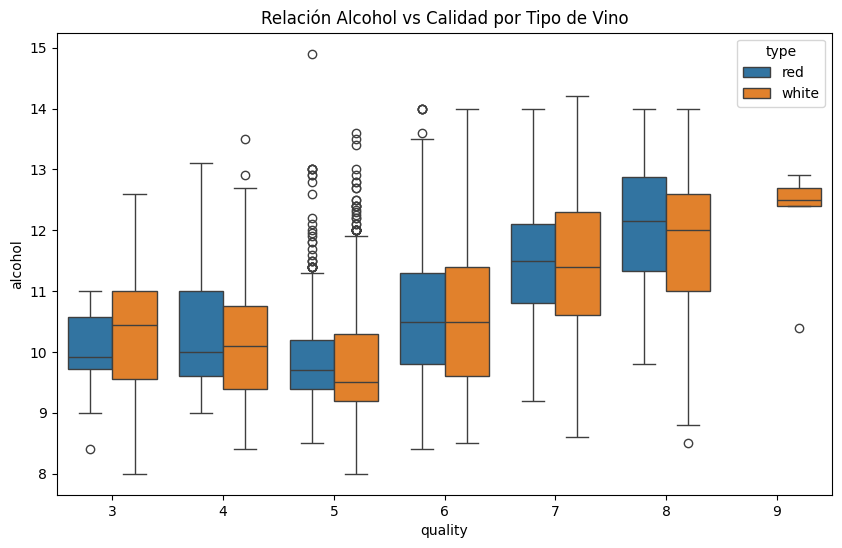

In [ ]:
# Agrupamos por tipo y calidad 
print("Media de las variables por tipo y calidad:")
display(df_wine.groupby(['type', 'quality']).mean(numeric_only=True))

# Calculamos la correlación
for wine_type in ['red', 'white']:
    print(f"\n Correlación de la calidad para el vino {wine_type}:")
    correlations = df_wine[df_wine['type'] == wine_type].corr(numeric_only=True)['quality'].sort_values(ascending=False)
    print(correlations)

# Visualizamos la relación entre el alcohol y la calidad
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_wine, x='quality', y='alcohol', hue='type')
plt.title('Relación alcohol y calidad según el vino')
plt.show()
print('Observo que a mayor cantidad de alcohol mayor es la calidad del vino.')

### <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i>3. Filtrar atípicos y manejar datos ausentes

•	Realiza un análisis estadístico o inspección visual de cada columna numérica para identificar valores atípicos.

•	Usa Pandas para filtrar y eliminar los datos atípicos y los valores ausentes. Explica en tu entrega qué criterios utilizaste para identificar los atípicos.



Nota: La primera vez que manejamos un set de datos debemos hacer un analisis general para detectar si podemos sacar conclusiones por medio del analisis estadistico de los datos, antes de abordarlo debemos documentarnos sobre el funcionamiento de la campana de Gauss de distribución normal y como se relaciona con el calculo de la dispersión a traves de la desviación estandar .

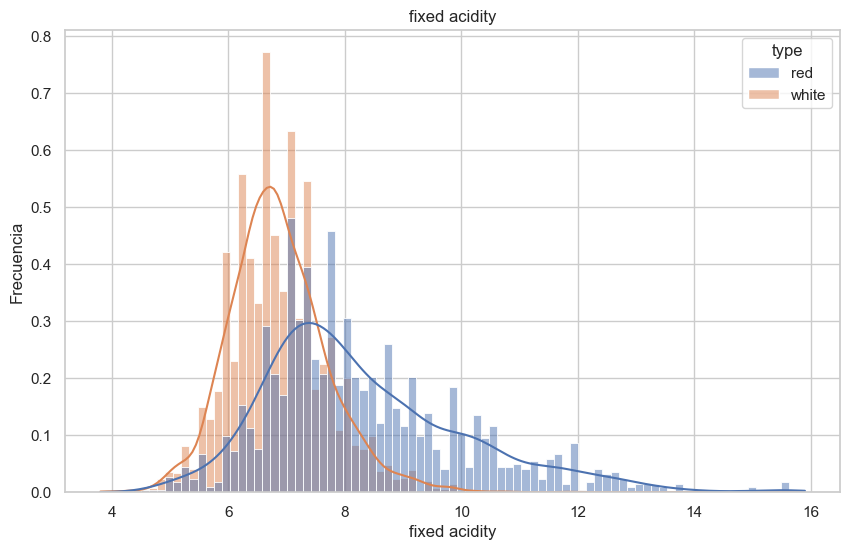

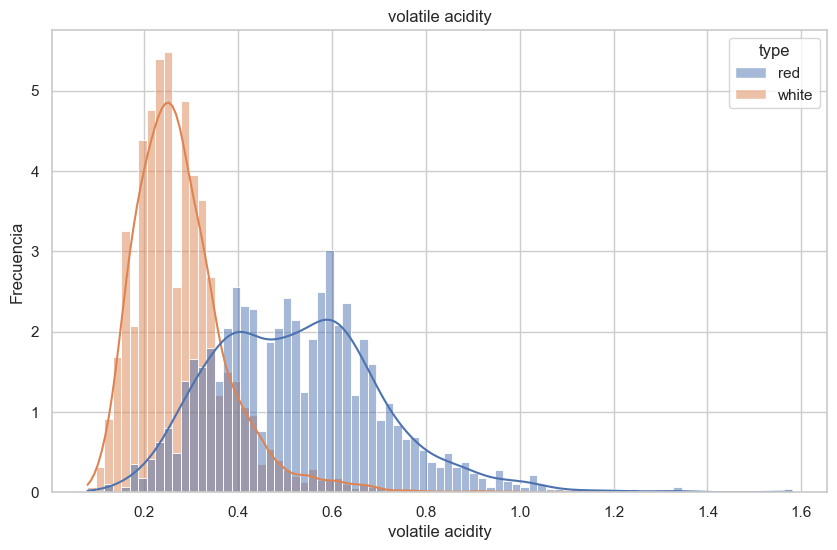

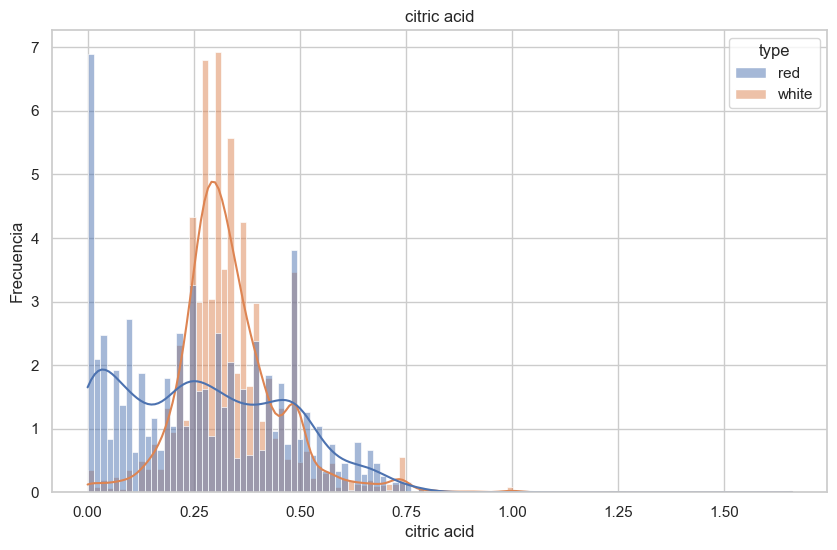

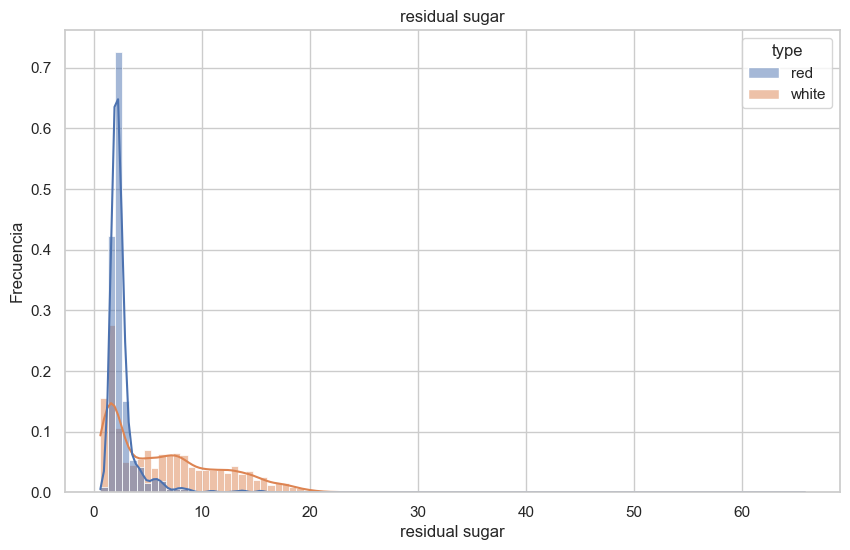

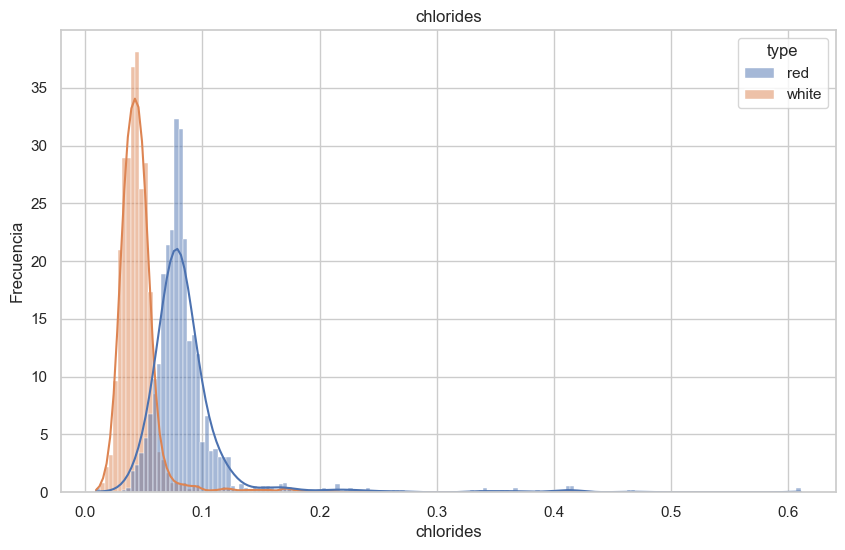

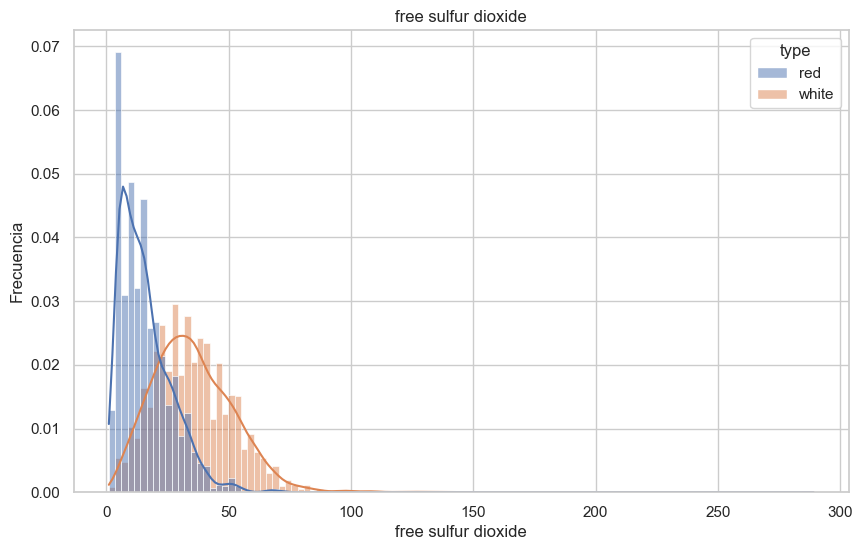

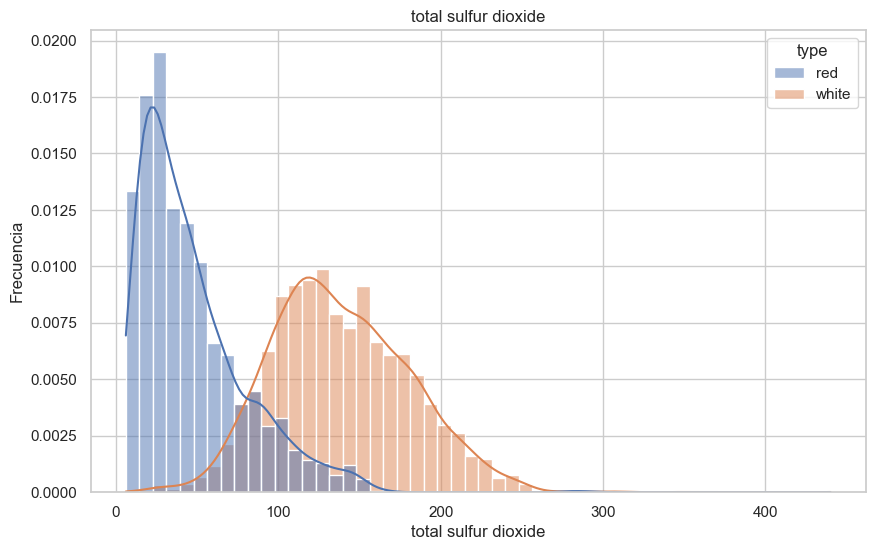

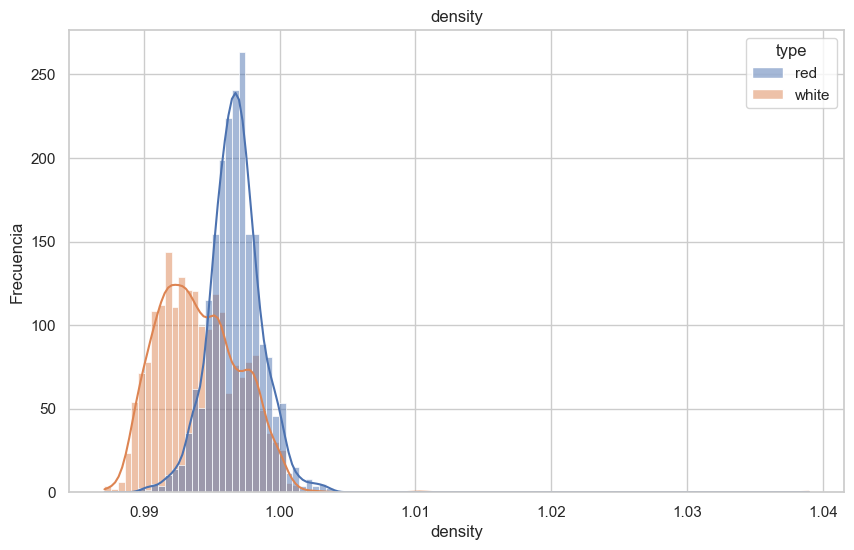

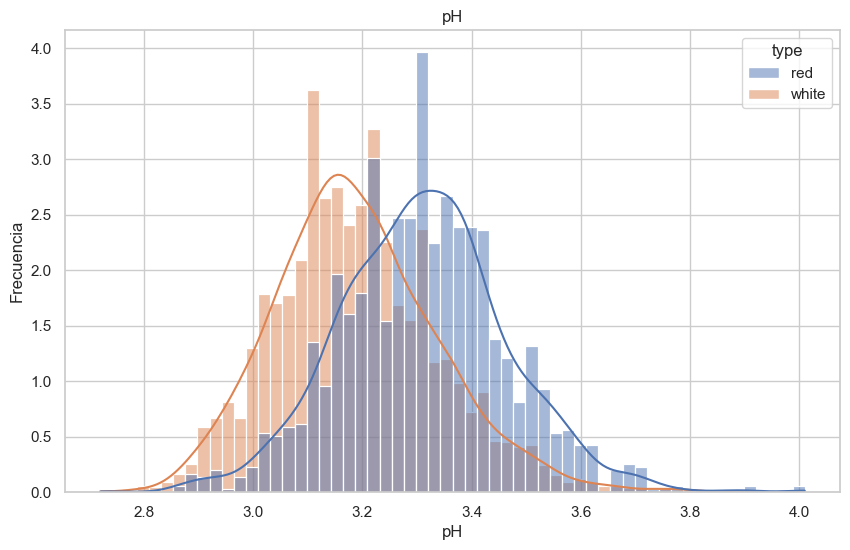

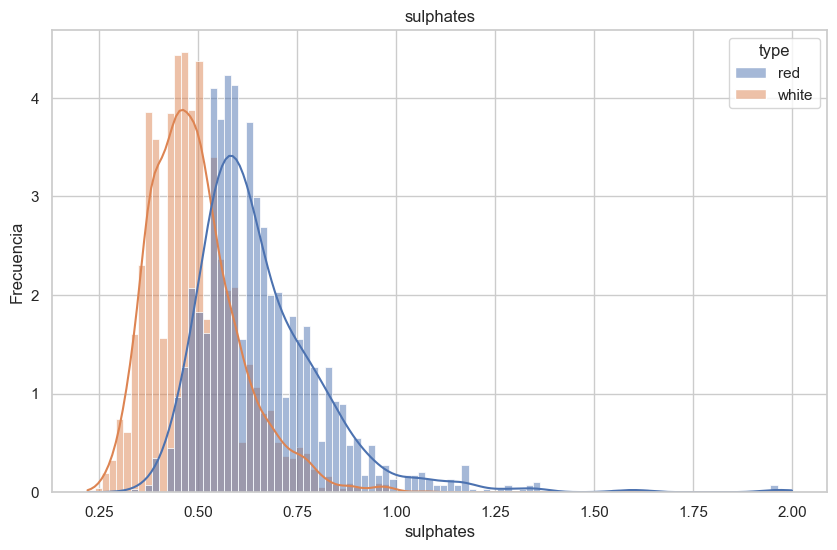

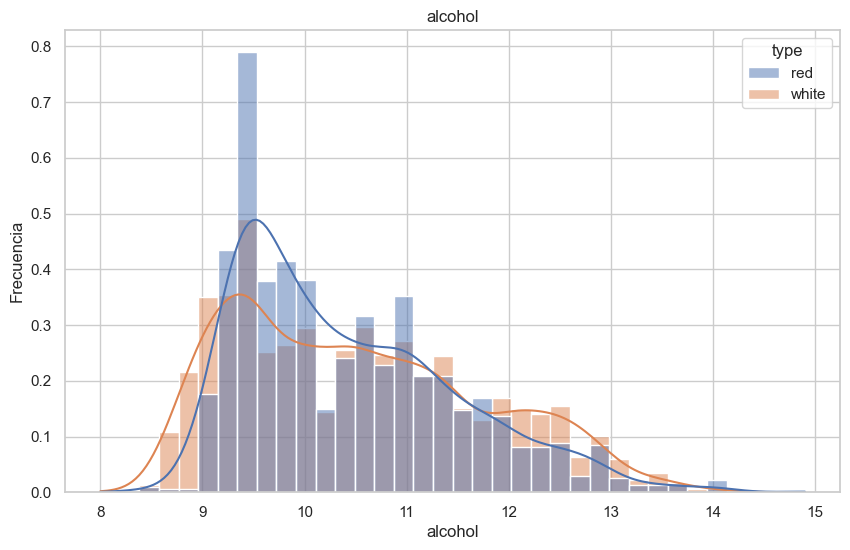

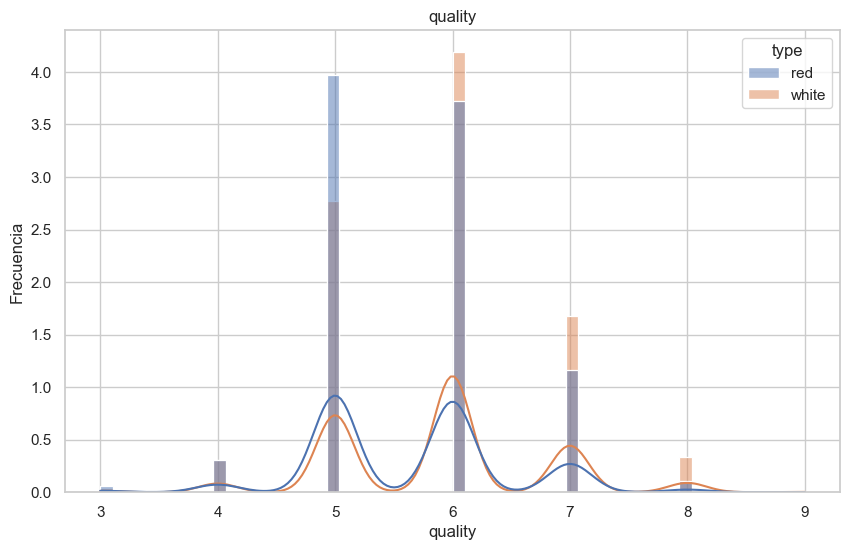

In [61]:
# Identificar valores atípicos con la campana de Gauss
df_wine.describe() # Analizo los datos estadísticos de cada columna antes de realizar las camapanas de Gauss por tipo

num_columns = df_wine.select_dtypes(include=np.number).columns # Con la librería de numpy cojo las columnas que solo tengan valores numéricos para representarlas.

for col in num_columns:
    plt.figure(figsize=(10, 6)) # Tamaño de la figura
    sns.histplot(data=df_wine, x=col, hue='type', kde=True, stat="density", common_norm=False)  # Este es el histrograma para cada tipo de vino
    plt.title(f'{col}') #título del histograma
    plt.xlabel(col) # etiqueta para el eje x
    plt.ylabel('Frecuencia') # etiqueta para el eje y
    plt.show() # mostramos los histogramas 
    

# Este paso lo realizo sacando los valores atípicos de cada columna numérica porque puede que existan esos valores en cada una de las columnas.

In [11]:
# Eliminamos los valores atípicos usando el método del rango intercuartílico (IQR) porque veo montañas deformes o sesgadas
Q1 = df_wine[num_columns].quantile(0.25) # Q1 equivale al 25%
Q3 = df_wine[num_columns].quantile(0.75) # Q2 equivale al 75%
IQR = Q3 - Q1 # Rango Intercuartílico

# Filtramos los datos y eliminamos los valores atípicos, y nos quedamos con los que esten entre los valores Q1 y Q3
filter = ~((df_wine[num_columns] < (Q1 - 1.5 * IQR)) | (df_wine[num_columns] > (Q3 + 1.5 * IQR))).any(axis=1) 
df_wine_cleaned = df_wine[filter] # Este sería el df limpio
df_wine_cleaned.sample(15)
  

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4670            6.5              0.36         0.38            10.2      0.028   
2296            7.5              0.31         0.51            14.8      0.039   
954             7.6              0.43         0.40             2.7      0.082   
1701            6.0              0.21         0.24            12.1      0.050   
1651            6.2              0.16         0.33             1.1      0.057   
3157            6.2              0.43         0.49             6.4      0.045   
4574            8.0              0.14         0.33             1.2      0.045   
5568            6.4              0.17         0.30             2.8      0.034   
4987            8.8              0.39         0.35             1.8      0.096   
4619            8.4              0.32         0.35            11.7      0.029   
3713            7.7              0.23         0.31            10.7      0.038   
4385            8.0              0.30         0.36            11.0      0.034   
6308            5.9              0.21         0.31             1.8      0.033   
975             7.2              0.41         0.30             2.1      0.083   
2513            8.0              0.32         0.26             1.2      0.050   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4670                 20.0                  82.0  0.99274  3.10       0.43   
2296                 62.0                 204.0  0.99820  3.06       0.60   
954                   6.0                  11.0  0.99538  3.44       0.54   
1701                 55.0                 164.0  0.99700  3.34       0.39   
1651                 21.0                  82.0  0.99100  3.32       0.46   
3157                 12.0                 115.0  0.99630  3.27       0.57   
4574                 71.0                 162.0  0.99140  3.07       0.47   
5568                 33.0                 125.0  0.99152  3.03       0.49   
4987                 22.0                  80.0  0.99016  2.95       0.54   
4619                  3.0                  46.0  0.99439  3.02       0.34   
3713                 59.0                 186.0  0.99690  3.12       0.55   
4385                  8.0                  70.0  0.99354  3.05       0.41   
6308                 45.0                 142.0  0.98984  3.35       0.50   
975                  35.0                  72.0  0.99700  3.44       0.52   
2513                 11.5                  88.0  0.99460  3.24       0.37   

      alcohol  quality   type  
4670     12.1        7  white  
2296      9.5        5  white  
954      12.2        6    red  
1701      9.4        5  white  
1651     10.9        7  white  
3157      9.0        4  white  
4574     11.0        6  white  
5568     10.4        6  white  
4987     12.6        6  white  
4619     11.8        6  white  
3713      9.5        6  white  
4385     12.2        6  white  
6308     12.7        6  white  
975       9.4        5    red  
2513      9.5        4  white

### <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i>4. Almacenar los datos limpios en SQLite

•	Usa SQLite para almacenar el dataframe limpio en una base de datos persistente.

•	Sigue la documentación oficial de SQLite: SQLite Python Documentation. https://docs.python.org/3/library/sqlite3.html

In [12]:
# Creamos una conexión a BBDD para que sqlite3 trabaje con ella, creamos la bbdd si no exite.
con = sql.connect("PC1.db")
cur = con.cursor() # Cursor de bbdd

# Creamos la tabla de vinos
# cur.execute("CREATE TABLE tb_wines(fixed acidity, volatile acidity,citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, type)")

# # Podemos verificar que la nueva tabla se ha creado
# res = cur.execute("SELECT name FROM sqlite_master")
# res.fetchone()

# # # Insertar filas más llamando cur.executemany(...):
# cur.executemany("INSERT INTO tb_wines VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?)", df_wine_cleaned.values.tolist())
# con.commit() # Guardamos los cambios en la bbdd

# # verificar que las nuevas filas se insertaron ejecutando una SELECTconsulta, esta vez iterando sobre los resultados de la consulta:
# for row in cur.execute("SELECT fixed acidity, chlorides FROM tb_wines"):
#     print(row)
# con.close()

# la base de datos se haya escrito en el disco llamando con.close() para cerrar la conexión existente, abriendo una nueva, creando un nuevo cursor y luego consultando la base de datos
new_con = sql.connect("PC1.db")
new_cur = new_con.cursor()
res = new_cur.execute("SELECT type, pH, alcohol FROM tb_wines")
type, pH, alcohol = res.fetchone()
type, pH, alcohol = res.fetchone()
print(f'Vino: {type}, pH: {pH}, alcohol: {alcohol}')
new_con.close()



Vino: red, pH: 3.35, alcohol: 10.5


### <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i>5. Realizar 3 consultas en SQLite

Basándote en los datos y las columnas del dataset, realiza las siguientes consultas:
1.	Consulta : ¿Cuál es el promedio de calidad (quality) por tipo de vino (type)?
2.	Consulta : ¿Cuántos vinos tienen un nivel de alcohol superior a 10.5, agrupados por tipo?
3.	Consulta : Obtén el conteo de vinos por nivel de acidez (fixed acidity) agrupados en rangos (por ejemplo, de 0-5, 5-10, 10-15).


In [13]:
# ¿Cuál es el promedio de calidad (quality) por tipo de vino (type)?
con = sql.connect("PC1.db")
cur = con.cursor() # Cursor de bbdd
res = cur.execute("SELECT AVG(quality), type FROM tb_wines GROUP BY type") # Sentencia que calcula el promedio de calidad según el vino
quality_red, type_red = res.fetchone() # Primer registro
quality_white, type_white = res.fetchone() # Segundo registro
print(f'EL promedio de calidad del vino {type_red} es: {quality_red}')
print(f'EL promedio de calidad del vino {type_white} es: {quality_white}')

EL promedio de calidad del vino red es: 5.656891495601173
EL promedio de calidad del vino white es: 5.848244348244348


In [14]:
# ¿Cuántos vinos tienen un nivel de alcohol superior a 10.5, agrupados por tipo?
con = sql.connect("PC1.db")
cur = con.cursor() # Cursor de bbdd
res = cur.execute("SELECT COUNT(alcohol), type FROM tb_wines WHERE alcohol > 10.5 GROUP BY type") # sentencia sql para sacar la cantidad de vinos superiores a 10.5 según el tipo
quantity_alcohol_red, type_red = res.fetchone() # Primer registro
quantity_alcohol_white, type_white = res.fetchone() # Segundo registro
print(f'Los vinos de tipo {type_red}, tiene {quantity_alcohol_red} de vinos que superan los 10.5 grados de alcohol')
print(f'Los vinos de tipo {type_white}, tiene {quantity_alcohol_white} de vinos que superan los 10.5 grados de alcohol')


Los vinos de tipo red, tiene 257 de vinos que superan los 10.5 grados de alcohol
Los vinos de tipo white, tiene 1902 de vinos que superan los 10.5 grados de alcohol


### <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i>6. Exportar datos a JSONLines

De cara a una potencial insercion en una base de datos noSQL como mongoDB, podemos servirnos de pandas para preparar los datos.

•	¿Qué estructura de datos de python es la más similar a un documento noSQL? JSON.

•	Usa Pandas para transformar los datos de una de las consultas en un archivo JSONLines.

•	Usa la librería jsonlines para guardar el archivo.

•	¿Qué problemas podrían surgir al transformar un dataframe en jsonlines? Puede que la estructura de datos no sea igual a la del dataframe por lo que se rompería la estructura de los datos.

•	Añade una columna que sea originalmente un np.array,¿qué sucede al transformarlo en jsonlines?

•	Añade una columna que sea originalmente un pd.datetime,¿qué sucede al transformarlo en jsonlines?


In [15]:
# Transformar los datos de una de las consultas en un archivo JSON.
con = sql.connect("PC1.db")
cur = con.cursor() # Cursor de bbdd
sql_sentence = cur.execute("SELECT * FROM tb_wines") # Tomamos todos los datos de sqlite
rows = cur.fetchall() # obtener datos y nombres
column_names = [description[0] for description in cur.description] # Obtenemos los nombres de todas las columnas como clave y despues asigarles un valor
data=[]
for row in rows:
    data.append(dict(zip(column_names, row))) # Insertamos "clave": "valor"
con.close() # Cerramos conexión
json_output = json.dumps(data, indent=4) # Convertimos a JSON
print(json_output)



[
    {
        "fixed": 7.9,
        "volatile": 0.6,
        "citric": 0.06,
        "residual": 1.6,
        "chlorides": 0.069,
        "free": 15,
        "total": 59,
        "density": 0.9964,
        "pH": 3.3,
        "sulphates": 0.46,
        "alcohol": 9.4,
        "quality": 5,
        "type": "red"
    },
    {
        "fixed": 7.5,
        "volatile": 0.5,
        "citric": 0.36,
        "residual": 6.1,
        "chlorides": 0.071,
        "free": 17,
        "total": 102,
        "density": 0.9978,
        "pH": 3.35,
        "sulphates": 0.8,
        "alcohol": 10.5,
        "quality": 5,
        "type": "red"
    },
    {
        "fixed": 6.7,
        "volatile": 0.58,
        "citric": 0.08,
        "residual": 1.8,
        "chlorides": 0.097,
        "free": 15,
        "total": 65,
        "density": 0.9959,
        "pH": 3.28,
        "sulphates": 0.54,
        "alcohol": 9.2,
        "quality": 5,
        "type": "red"
    },
    {
        "fixed": 7.5,
        "

In [16]:
# Añade una columna que sea originalmente un np.array,¿qué sucede al transformarlo en jsonlines?
con = sql.connect("PC1.db")
cur = con.cursor() # Cursor de bbdd
sql_sentence = cur.execute("SELECT * FROM tb_wines") # Sentencia sql
rows = cur.fetchall() # Obtener datos y nombres
column_names = [description[0] for description in cur.description] # Obtenemos los nombres de todas las columnas como clave y despues asigarles un valor
data=[]
for row in rows:
    row_dict = dict(zip(column_names, row)) # "clave": "valor"
    row_dict['np_array'] = np.array([1, 2, 3])  # Añadimos una columna con un np.array
    data.append(row_dict)#insertamos documento
con.close() # Cerramos conexión
json_output = json.dumps(data, indent=4) # Convertir a JSON
print(json_output)

# Object of type ndarray is not JSON serializable: la lista no es compatible con json

TypeError: Object of type ndarray is not JSON serializable

In [ ]:
# Añade una columna que sea originalmente un pd.datetime,¿qué sucede al transformarlo en jsonlines?
con = sql.connect("PC1.db")
cur = con.cursor() # Cursor de bbdd
sql_sentence = cur.execute("SELECT * FROM tb_wines") #sentencia en sql 
rows = cur.fetchall() # obtener datos
column_names = [description[0] for description in cur.description] # Obtenemos los nombres de todas las columnas como clave y despues asigarles un valor
data=[]
for row in rows: #bucle para insertar todos los datos en un json
    row_dict = dict(zip(column_names, row)) # "clave": "valor"
    row_dict['pd_datetime'] = pd.to_datetime('01-01-2026')  # Añadimos una columna con un pd.datetime
    data.append(row_dict) #insertamos documento
con.close() # Cerramos conexión
json_output = json.dumps(data, indent=4) # Convertir a JSON
print(json_output) 

# Object of type Timestamp is not JSON serializable: la estructura de fecha no es compatible con json

TypeError: Object of type Timestamp is not JSON serializable

### <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i>7. Análisis de calidad de los vinos

•	Inspecciona qué caracteriza a los vinos tintos y blancos con mayor calidad (quality).

•	Usa análisis estadístico, gráficos o cualquier técnica que consideres relevante para identificar patrones.


He cogido una muestra del código anterior porque ya he observado que a mayor cantidad de alcohol mejor es el vino.
Media de las variables por tipo y calidad:


fixed acidity  volatile acidity  citric acid  residual sugar  \
type  quality                                                                 
red   4             7.522222          0.462778     0.291111        4.111111   
      5             7.718543          0.506722     0.248742        2.403808   
      6             7.624912          0.445404     0.269579        2.358947   
      7             8.052326          0.360988     0.349186        2.686628   
white 4             7.103125          0.340625     0.304219        4.621484   
      5             6.923064          0.295058     0.319967        6.696211   
      6             6.832575          0.257537     0.325321        6.174406   
      7             6.755125          0.262807     0.325697        5.134803   

               chlorides  free sulfur dioxide  total sulfur dioxide   density  \
type  quality                                                                   
red   4         0.076778            12.222222             46.111111  0.996362   
      5         0.078980            18.096026             63.612583  0.996755   
      6         0.075270            17.226316             44.708772  0.995949   
      7         0.069128            13.883721             31.011628  0.995319   
white 4         0.047695            21.238281            122.742188  0.994166   
      5         0.047099            35.040774            148.615321  0.994934   
      6         0.042548            34.910723            135.901366  0.993777   
      7         0.037855            33.553635            124.408820  0.992402   

                     pH  sulphates    alcohol  
type  quality                                  
red   4        3.345556   0.550000  10.250000  
      5        3.332384   0.583344   9.879305  
      6        3.341684   0.643088  10.616667  
      7        3.324302   0.704302  11.548256  
white 4        3.183438   0.470313  10.198047  
      5        3.174160   0.480848   9.895618  
      6        3.190349   0.487481  10.624928  
      7        3.211001   0.495125  11.386512


 Correlación de la calidad para el vino red:
quality                 1.000000
alcohol                 0.511616
sulphates               0.409818
citric acid             0.203920
fixed acidity           0.069489
residual sugar          0.004705
pH                     -0.004016
free sulfur dioxide    -0.101169
chlorides              -0.232194
density                -0.318341
total sulfur dioxide   -0.331185
volatile acidity       -0.385475
Name: quality, dtype: float64

 Correlación de la calidad para el vino white:
quality                 1.000000
alcohol                 0.415781
pH                      0.083604
sulphates               0.053865
free sulfur dioxide     0.037014
citric acid             0.036438
residual sugar         -0.079100
fixed acidity          -0.090352
total sulfur dioxide   -0.158851
volatile acidity       -0.185404
chlorides              -0.284414
density                -0.293510
Name: quality, dtype: float64


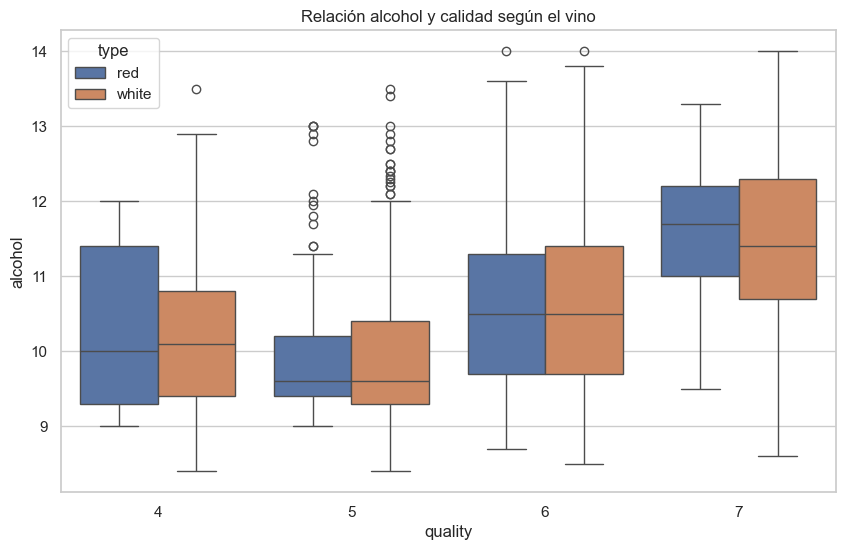

In [65]:
print("He cogido una muestra del código anterior porque ya he observado que a mayor cantidad de alcohol mejor es el vino.")
# Agrupamos por tipo y calidad 
print("Media de las variables por tipo y calidad:")
display(df_wine_cleaned.groupby(['type', 'quality']).mean(numeric_only=True))

# Calculamos la correlación
for wine_type in ['red', 'white']:
    print(f"\n Correlación de la calidad para el vino {wine_type}:")
    correlations = df_wine_cleaned[df_wine_cleaned['type'] == wine_type].corr(numeric_only=True)['quality'].sort_values(ascending=False)
    print(correlations)

# Visualizamos la relación entre el alcohol y la calidad
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_wine_cleaned, x='quality', y='alcohol', hue='type')
plt.title('Relación alcohol y calidad según el vino')
plt.show()

#En este caso veo que para el vino tinto el alcohol es el valor mas importante y sulphates y citric acid, son valores relevantes porque hacen que la calidad del vino también sea mayor
#En cambio en el vino blanco el alcohol sigue siendo el valor más importante y relevante




### <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Notas adicionales para la entrega 

•	Asegúrate de documentar cada paso en tu entrega y justificar tus decisiones (por ejemplo, cómo identificaste los atípicos).

•	El entregable principal será un Jupyter notebook con todos los pasos que habéis seguido y las explicaciones que consideréis pertinentes.

•	Incluye en un fichero requirements.txt todas las librerías que estés utilizando.

•	La entrega se hará a través de Campus. 
________________________________________
¡Buena suerte con el proyecto! 😊
